In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import networkx as nx
import scipy as sp
import re
from sklearn.preprocessing import MinMaxScaler
import os, sys

%matplotlib inline

**Public Bucket for csv https://storage.googleapis.com/datascibucket/cs505/**

In [44]:
data_config = {}
data_config['dataset_month'] = 'dec2015'

In [45]:
df = pd.read_csv(data_config['dataset_month'] + '_committers.csv')

In [46]:
df = df.dropna()
df.head(100)

,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,anthraxx,bfe9c09a46c4caeed56053d26bf5c0fb0a5a4e36@leven...,2015-12-22 03:27:21 UTC,anthraxx/jenkins.debian.net,560
1,Dinh Nguyen,a48724738fc762a7f206428dfcaf7ede2fd84d0f@opens...,2015-12-08 16:06:00 UTC,enclustra-bsp/altera-linux,153
2,Randy Houlahan,138f24e6d522bdb974022bc5d938c75a46c92ac5@cbd.int,2015-12-18 21:03:08 UTC,scbd/chm.cbd.int,135
3,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,calamares/calamares,132
4,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,shadeslayer/calamares,132
5,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,Gormogon/calamares,132
6,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,tctara/calamares,132
7,Craig Barraclough,e9f4f0fc71d8f67bae66d3fb30f6126fcf90d1e9@users...,2015-12-10 00:48:09 UTC,cbarrac/jokes,122
8,Craig Barraclough,e9f4f0fc71d8f67bae66d3fb30f6126fcf90d1e9@users...,2015-12-10 00:48:10 UTC,cbarrac/jokes,119
9,Paul T. Bauman,2dec05da03051ba35643dda8bde9459781a22658@gmail...,2015-12-03 20:27:56 UTC,nicholasmalaya/grins,108


In [47]:
# only gets rows where there is a valid email for the user
df_valid_emails = df[df.committer_email.str.contains(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", regex=True)]
df_valid_emails.head(100)

C:\Users\Brian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,anthraxx,bfe9c09a46c4caeed56053d26bf5c0fb0a5a4e36@leven...,2015-12-22 03:27:21 UTC,anthraxx/jenkins.debian.net,560
1,Dinh Nguyen,a48724738fc762a7f206428dfcaf7ede2fd84d0f@opens...,2015-12-08 16:06:00 UTC,enclustra-bsp/altera-linux,153
2,Randy Houlahan,138f24e6d522bdb974022bc5d938c75a46c92ac5@cbd.int,2015-12-18 21:03:08 UTC,scbd/chm.cbd.int,135
3,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,calamares/calamares,132
4,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,shadeslayer/calamares,132
5,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,Gormogon/calamares,132
6,Teo Mrnjavac,437a1c14efaa8e9881ef6bb077411dc1d24cb4c0@kde.org,2015-12-30 16:27:13 UTC,tctara/calamares,132
7,Craig Barraclough,e9f4f0fc71d8f67bae66d3fb30f6126fcf90d1e9@users...,2015-12-10 00:48:09 UTC,cbarrac/jokes,122
8,Craig Barraclough,e9f4f0fc71d8f67bae66d3fb30f6126fcf90d1e9@users...,2015-12-10 00:48:10 UTC,cbarrac/jokes,119
9,Paul T. Bauman,2dec05da03051ba35643dda8bde9459781a22658@gmail...,2015-12-03 20:27:56 UTC,nicholasmalaya/grins,108


In [48]:
# Group by repo_name so the results are rows with repo_names with counts for contributions
unique_emailandrepo_df = df_valid_emails.groupby(['committer_email', 'committer_name', 'repo_name'], as_index=False).aggregate(np.sum).sort_values('total_num_commits', ascending=False)
unique_emailandrepo_df.reset_index()

,index,committer_email,committer_name,repo_name,total_num_commits
0,96661,55184e841a05d5233609b6ff75384d8204937664@yahoo.de,fusionjack,SlimSaber/android_kernel_oppo_msm8974,4796
1,165773,8ec285a53e21b773fd914e03c50e1b6431bc9aa8@samsu...,Chanho Park,SamsungARTIK/linux-artik,4430
2,48177,296686bb0531201fd067ff2d08090216580c7b09@comca...,aicjofs@comcast.net,aicjofs/android_kernel_fuhu_t8400n,2171
3,238084,cb9e8792e4f5a304df23cea02491c8fcc78acfed@nuvot...,ccwang,nuvotonmcu/linux-3.10.y,1546
4,136900,74fe9cff5373f78abc31dd755ce569f2115839f3@gmail...,beroid,beroid/android_kernel_cyanogen_msm8916,1526
5,261054,e098dc32bc11356718c383ec6268550c31939aa6@gmail...,"KOBAYASI, Hiroaki",hkoba/tkhtml3,1251
6,32189,1c5b678ffa30ab130073521930d7f2e5f75f3de9@gmail...,Susan McCombs,smac0628/android_kernel_huawei_angler,1216
7,117540,64b2b6d12bfe4baae7dad3d018f8cbf6b0e7a044@wassi...,Wassim Chegham,wassimchegham/github-contributions-hack,1144
8,8477,072468c8d57c1bc1d0a76a9cc3a7c752ce753571@gmail...,Adrian Chifor,adrianchifor/nyan-cat-commit-graph,975
9,53724,2f83220dcb39af202076aa49e987bcf684a98450@gmail...,David Binetti,dbinetti/barberscore,886


In [49]:
def calculate_core_dec(graph):
    core_dec = nx.core_number(graph)
    #print(core, "\n")
    print("Graph: {}, Max Core number: {}".format(graph.name, max(core_dec.values())))
    
    return core_dec

In [50]:
#Plot the networks with networkx

colors = ['#787878', '#856b6b', '#965a5b', '#a7494b', '#bb3537', '#cb2528', '#cb2528', '#f00004']

def plot_network(graphs, layout, node_size, with_labels):

    for i, graph in enumerate(graphs):
        core_dec = calculate_core_dec(graph)
#         print(core_dec)
        node_colors = colors
        plt.figure()
        if layout == '':
            nx.draw(graph, node_color=node_colors, with_labels=with_labels, node_size=node_size)
        elif layout == 'circular_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.circular_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'random_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.random_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'shell_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.shell_layout(graph), with_labels=with_labels, node_size=node_size)
        else:
            nx.draw(graph, node_color=node_colors, pos=nx.spectral_layout(graph), with_labels=with_labels, node_size=node_size) 

## Degree distribution

In [51]:
#Degree distributions
def plot_degree_distributions(graphs):
    for graph in graphs:
        degree_sequence=sorted(nx.degree(graph).values(),reverse=True) 
        dmax=max(degree_sequence)
        print('Degree max for {}: {}'.format(graph, dmax))
        
        plt.figure()
        h,bins,patches = plt.hist(degree_sequence,bins=range(0,dmax))
        plt.title("Degree distribution for {}".format(graph.name))
        plt.xlabel("degree")
        plt.ylabel("number of nodes")

# plot_degree_distributions([G_onlyrepos, G_onlyusers])

The degree distribution looks like what you would expect from a small world network, given that there are very few with high degrees but they do exist unlike a degree distribution of a random network.

## Clustering Coefficients and Stats

In [52]:
def print_stats_of_notconnected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        #print('\tDiameter: {}'.format(nx.diameter(graph)))
        #print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
def print_stats_of_connected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        print('\tDiameter: {}'.format(nx.diameter(graph)))
        print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
        
def plot_clusteringcoeff_distributions(graphs):
    for graph in graphs:
        plt.figure()
        h,bins,patches = plt.hist(list(nx.clustering(graph).values()))
        plt.title("Clustering coefficient distribution for {}".format(graph.name))
        plt.ylabel("number of nodes")

## Create Graphs

In [53]:
B = nx.Graph()
B.add_nodes_from(unique_emailandrepo_df['committer_email'].head(5000),bipartite=0)
B.add_nodes_from(unique_emailandrepo_df['repo_name'].head(5000),bipartite=1)
B.add_edges_from(unique_emailandrepo_df[['committer_email','repo_name']].head(5000).values)
nx.bipartite.is_bipartite(B)
B.name = 'Bipartite Graph of Users and Repositories'

nx.write_gml(B, data_config['dataset_month'] + '_bipartite_graph.gml')

In [54]:
one_mode_users = nx.bipartite.projected_graph(B, unique_emailandrepo_df['committer_email'].head(5000))
one_mode_users.name = 'One-mode Bipartite Graph of Users'
nx.write_gml(one_mode_users, data_config['dataset_month'] + 'one_mode_users.gml')

In [55]:
one_mode_repos = nx.bipartite.projected_graph(B, unique_emailandrepo_df['repo_name'].head(5000))
one_mode_repos.name = 'One-mode Bipartite Graph of Repositories'
nx.write_gml(one_mode_repos, data_config['dataset_month'] + 'one_mode_repos.gml')

In [56]:
# #Plot graphs
# node_size = 50
# with_labels = False
# plot_network([B], '', node_size, with_labels)

# TODO: Get graphs from GEPHI

## Analyze Graphs

### Degree Distributions:

Degree max for One-mode Bipartite Graph of Users: 13
Degree max for One-mode Bipartite Graph of Repositories: 492
Degree max for Bipartite Graph of Users and Repositories: 462


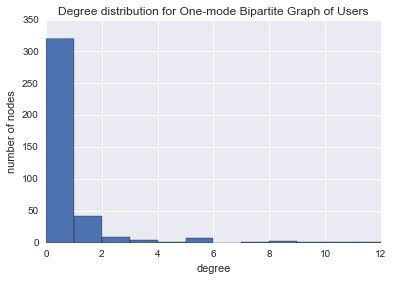

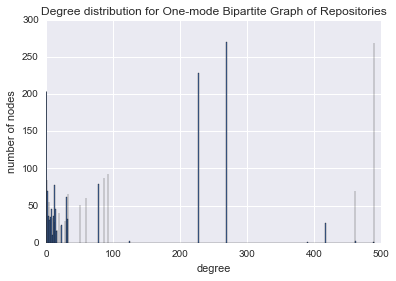

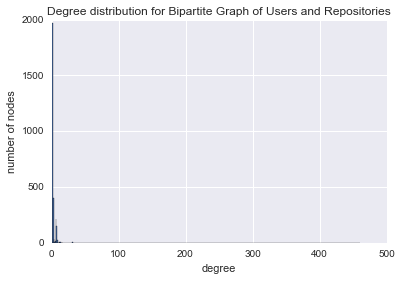

In [57]:
plot_degree_distributions([one_mode_users, one_mode_repos, B])

The graphs look like exponential-log graphs as real-life networks should look, however, there is a weird spike in number of nodes in the one-mode repositories only graph, with a high degree. There are exactly 637 nodes representing repos with degrees of exactly 714. This could mean there are 714 repositories that a set of users (like developers in a company) needed to contribute to for some reason. When observing the graph visually, there is a massive cluster of interconnected nodes that represents this spike in data.

In [58]:
#Get the repos with degree = 714


### Clustering Coefficient Distributions:

Stats for One-mode Bipartite Graph of Users:
	Average clustering coefficient: 0.07240459370561413
Stats for One-mode Bipartite Graph of Repositories:
	Average clustering coefficient: 0.8816448428948571
Stats for Bipartite Graph of Users and Repositories:
	Average clustering coefficient: 0.0


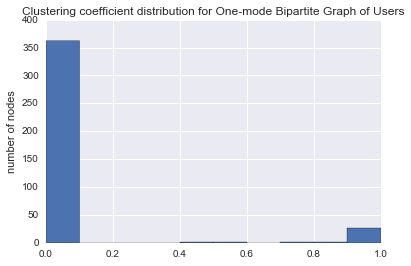

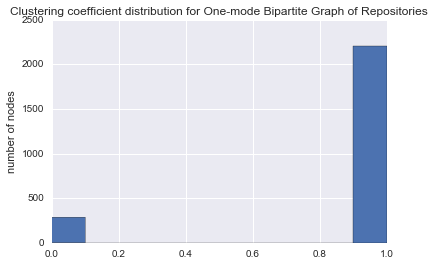

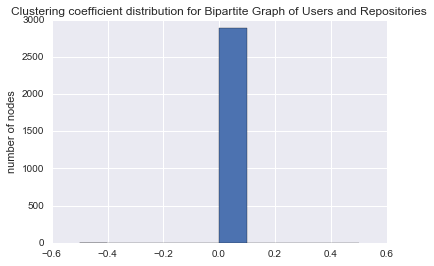

In [59]:
#Plot Clustering Coefficients of graph of repos and graph of users
print_stats_of_notconnected([one_mode_users, one_mode_repos, B])
plot_clusteringcoeff_distributions([one_mode_users, one_mode_repos, B])

It makes sense that there would be such a vast difference in clustering coefficients, due to the connectivity observed between repositories. Of the nodes with degrees greater than 0, usually there are highly interconnected subgraphs between users or repositories. The bipartite graph of course has clustering coefficients of 0 because there is no possible way for a triangle to form between connected triplets of nodes.  

# Centrality

In [60]:
# def plot_network_centralities(graphs, with_labels):

#     for i, graph in enumerate(graphs):
#         pos = nx.spring_layout(graph)
        
#         plt.figure(figsize=(12,4))
#         plt.subplot(131)
#         cent = np.array(list(nx.closeness_centrality(graph).values()))
#         scaler = MinMaxScaler((50,800))
#         scaledC = scaler.fit_transform(cent[:,np.newaxis])
#         nx.draw(graph, node_size=scaledC, pos=pos, node_color='#6699cc', with_labels=with_labels)
#         plt.title("Closeness Centrality")

#         plt.subplot(132)
#         cent = np.array(list(nx.betweenness_centrality(graph).values()))
#         scaler = MinMaxScaler((50,800))
#         scaledC = scaler.fit_transform(cent[:,np.newaxis])
#         nx.draw(graph, node_size=scaledC, pos=pos, node_color='#6699cc', with_labels=with_labels)
#         plt.title("Betweenness Centrality")

#         plt.subplot(133)
#         cent = np.array(list(nx.eigenvector_centrality(graph).values()))
#         scaler = MinMaxScaler((50,800))
#         scaledC = scaler.fit_transform(cent[:,np.newaxis])
#         nx.draw(graph, node_size=scaledC, pos=pos, node_color='#6699cc', with_labels=with_labels)
#         _=plt.title("Eigenvector Centrality")

In [61]:
# plot_network_centralities([one_mode_users, one_mode_repos], with_labels=False)

In [62]:
# #Degree distributions
# def plot_centrality_distributions(graphs):
#     for graph in graphs:
#         plt.figure(figsize=(12,4))
        
#         plt.subplot(131)
#         cent = np.array(list(nx.closeness_centrality(graph).values()))
#         closeness_sequence=sorted(cent,reverse=True) 
#         dmax=max(closeness_sequence)
#         print('Closeness max for {}: {}'.format(graph, dmax))
#         plt.hist(cent,bins=np.linspace(0,1,20))
#         plt.title("Closeness Centrality Distribution for {}".format(graph.name))
#         plt.xlabel('Closeness Centrality')
#         _=plt.ylabel('Number of Nodes')
        
#         plt.subplot(132)
#         cent = np.array(list(nx.betweenness_centrality(graph).values()))
#         betweenness_sequence=sorted(cent,reverse=True) 
#         dmax=max(betweenness_sequence)
#         print('Betweenness max for {}: {}'.format(graph, dmax))
#         plt.hist(cent,bins=np.linspace(0,1,20))
#         plt.title("Betweenness Centrality Distribution for {}".format(graph.name))
#         plt.xlabel('Betweenness Centrality')
#         _=plt.ylabel('Number of Nodes')

#         plt.subplot(133)
#         cent = np.array(list(nx.eigenvector_centrality(graph).values()))
#         eigenvector_sequence=sorted(cent,reverse=True) 
#         dmax=max(eigenvector_sequence)
#         print('Eigenvector max for {}: {}'.format(graph, dmax))
#         plt.hist(cent,bins=np.linspace(0,1,20))
#         plt.title("Eigenvector Centrality Distribution for {}".format(graph.name))
#         plt.xlabel('Eigenvector Centrality')
#         _=plt.ylabel('Number of Nodes')
        
# plot_centrality_distributions([one_mode_users, one_mode_repos])

# Find Subgraphs that are Non-Cliques and of Decent Size

In [63]:
def generate_subgraphs(graphs):
    for curr_graph in graphs:
        #Generate connected subgraphs 
        #B = bipartite graph of users and repos
        #one_mode_users = one mode bipartite graph of users
        #one_mode_repos = one mode bipartite graph of repos
        graph_to_get_subgraphs_of = curr_graph
        print(graph_to_get_subgraphs_of.name)
        x = nx.connected_component_subgraphs(graph_to_get_subgraphs_of)
        print(x)
        
        #weed out graphs with less than 5 degrees max
        subgraphs = [g for g in x]
        subs = []
        for graph in subgraphs: 
            if max(sorted(nx.degree(graph).values(), reverse=True)) > 5: #weed out graphs with less than 5 degrees max
                subs.append(graph)
                
        #Get non-cliques and cliques in subs
        non_cliques = []
        cliques = []
        for g in subs:
            lst = list(nx.degree(g).values())
            if lst[1:] == lst[:-1]:
                cliques.append(g)
            else:
                non_cliques.append(g)

        print("Non-Cliques: {}".format(len(non_cliques)))
        print("Cliques: {}".format(len(cliques)))
        
        # Paths to write to
        cliques_path = "cliques/" + data_config['dataset_month'] + "/" + graph_to_get_subgraphs_of.name
        if not os.path.exists(cliques_path):
            os.makedirs(cliques_path)
        noncliques_path = "noncliques/" + data_config['dataset_month'] + "/" + graph_to_get_subgraphs_of.name
        if not os.path.exists(noncliques_path):
            os.makedirs(noncliques_path)

        # Write sub graphs to files
        for i, j in enumerate(non_cliques):
            nx.write_gml(j, noncliques_path + "/non_clique_subgraph_{}.gml".format(i))

        for i, j in enumerate(cliques):
            nx.write_gml(j, cliques_path + "/clique_subgraph_{}.gml".format(i))
            
generate_subgraphs([B, one_mode_repos, one_mode_users])

Bipartite Graph of Users and Repositories
<generator object connected_component_subgraphs at 0x000001F6197F3F68>
Non-Cliques: 58
Cliques: 0
One-mode Bipartite Graph of Repositories
<generator object connected_component_subgraphs at 0x000001F635D83780>
Non-Cliques: 1
Cliques: 51
One-mode Bipartite Graph of Users
<generator object connected_component_subgraphs at 0x000001F635D836D0>
Non-Cliques: 1
Cliques: 0
